In [14]:
from bigraph_viz import plot_bigraph, plot_multitimestep, plot_flow
from bigraph_viz.dict_utils import replace_regex_recursive, pp

save_images = True
plot_settings = {
    'remove_process_place_edges': True, 
    'size':'8,5', 
    'show_types': True, 
    'label_margin': '0.01'
}
save_images_settings = {
    'out_dir': 'out/vivarium_basics',
    'dpi': '250'
}
if save_images:
    plot_settings.update(save_images_settings)

colors = {
    'DNA': 'forestgreen',
    'RNA': 'darkorange',
    'protein': 'mediumpurple'
}

In [15]:
help(plot_bigraph)

Help on function plot_bigraph in module bigraph_viz.plot:

plot_bigraph(bigraph_schema, size='16,10', node_label_size='12pt', show_values=False, show_types=False, collapse_processes=False, port_labels=True, port_label_size='10pt', rankdir='TB', node_border_colors=None, node_fill_colors=None, node_groups=False, remove_nodes=None, invisible_edges=False, mark_top=False, remove_process_place_edges=False, print_source=False, dpi='70', label_margin='0.05', file_format='png', out_dir=None, filename=None)
    Plot a bigraph from bigraph schema.
    
    Args:
        bigraph_schema (dict): The bigraph schema dict that will be plotted.
        size (str, optional): The size of the output figure (example: '16,10'). Default is '16,10'.
        node_label_size (str, optional): The font size for the node labels. Default is None.
        show_values (bool, optional): Display on value info in node label. Default is False.
        show_types (bool, optional): Display on type info in node label. Defaul

Writing out/vivarium_basics/process


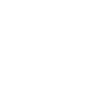

In [16]:
pr = {
    'transcription': {
        '_ports': {
            'DNA': '',
            'mRNA': '',
        }
    }
}
plot_settings1 = {
    'rankdir':'RL', 
    'filename': 'process',
    'port_labels': False,
    **plot_settings
}
plot_bigraph(pr, **plot_settings1)

In [17]:
tx = {
    'transcription': {
        'wires': {
            'DNA': 'DNA<br/>(concentrations)',
            'mRNA': 'mRNA<br/>(concentrations)',
        }
    }
}

Writing out/vivarium_basics/tx


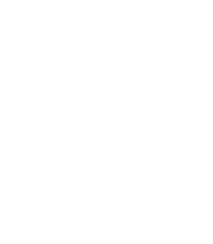

In [18]:
plot_settings2 = {
    'rankdir':'RL', 
    'filename': 'tx',
    'port_labels': False,
    'node_border_colors': {
        ('DNA<br/>(concentrations)',): colors['DNA'],
        ('mRNA<br/>(concentrations)',): colors['RNA'],
    },
    **plot_settings
}
plot_bigraph(tx, **plot_settings2)

In [19]:
txtl = {
    'transcription': {
        'wires': {
            'DNA': 'DNA<br/>(concentrations)',
            'mRNA': 'mRNA<br/>(concentrations)',
        }
    },
    'translation': {
        'wires': {
            'mRNA': 'mRNA<br/>(concentrations)',
            'protein': 'protein<br/>(concentrations)',
        }
    },
}

Writing out/vivarium_basics/txtl


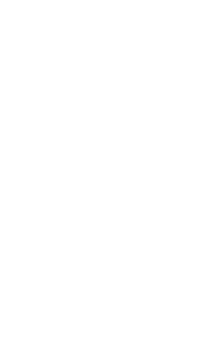

In [20]:
plot_settings3 = {
    'rankdir':'RL', 
    'filename': 'txtl',
    'port_labels': False,
    'node_border_colors': {
        ('DNA<br/>(concentrations)',): colors['DNA'],
        ('mRNA<br/>(concentrations)',): colors['RNA'],
        ('protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}
plot_bigraph(txtl, **plot_settings3)

In [21]:
txtlstoch = {
    'stochastic<br/>transcription': {
        'wires': {
            'DNA': 'DNA<br/>(counts)',
            'mRNA': 'mRNA<br/>(counts)',
        }
    },
    'counts-concentrations<br/>adapter': {
        'wires': {
            'counts': 'mRNA<br/>(counts)',
            'concentrations': 'mRNA<br/>(concentrations)',
        }
    },
    'translation': {
        'wires': {
            'mRNA': 'mRNA<br/>(concentrations)',
            'protein': 'protein<br/>(concentrations)',
        }
    },
}

Writing out/vivarium_basics/txtlstoch


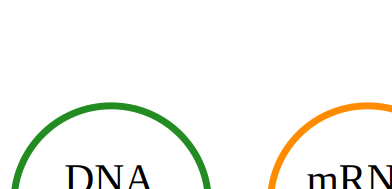

In [22]:
plot_settings4 = {
    'rankdir':'TB', 
    'filename': 'txtlstoch',
    'port_labels': False,
    'node_border_colors': {
        ('DNA<br/>(counts)',): colors['DNA'],
        ('mRNA<br/>(counts)',): colors['RNA'],
        ('mRNA<br/>(concentrations)',): colors['RNA'],
        ('protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}
plot_bigraph(txtlstoch, **plot_settings4)

In [23]:
agent = {
    'DNA<br/>(counts)': '', 
    'mRNA<br/>(counts)': '', 
    'mRNA<br/>(concentrations)': '', 
    'protein<br/>(concentrations)': '', 
    'boundary': '',
    'division': {
        'wires': {
            'boundary': 'boundary',
            'agents': ('..',)
        }
    },
    **txtlstoch
}

txtlhierarchy = {
    'agents': {
        '0': agent
    },
    'fields': '',
    'dimensions': '',
    'multibody': {
        'wires': {
            'agents': 'agents',
        }
    },
    'diffusion': {
        'wires': {
            'fields': 'fields',
            'agents': 'agents',
            'dimensions': 'dimensions',
        }
    },
}

Writing out/vivarium_basics/txtlhierarchy


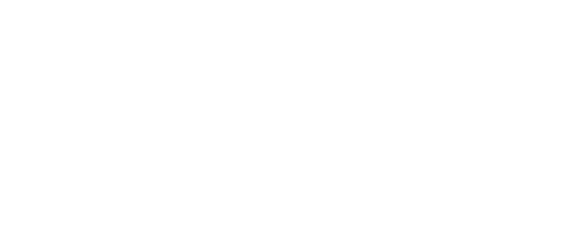

In [24]:
plot_settings5 = {
    'rankdir':'TB', 
    'filename': 'txtlhierarchy',
    'port_labels': False,
    'node_border_colors': {
        ('agents', '0', 'DNA<br/>(counts)',): colors['DNA'],
        ('agents', '0', 'mRNA<br/>(counts)',): colors['RNA'],
        ('agents', '0', 'mRNA<br/>(concentrations)',): colors['RNA'],
        ('agents', '0', 'protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}

plot_bigraph(txtlhierarchy, **plot_settings5)

In [25]:
txtldivide = {
    'agents': {
        '1': agent,
        '2': agent
    },
    'fields': '',
    'dimensions': '',
    'multibody': {
        'wires': {
            'agents': 'agents',
        }
    },
    'diffusion': {
        'wires': {
            'fields': 'fields',
            'agents': 'agents',
            'dimensions': 'dimensions',
        }
    },
}

Writing out/vivarium_basics/txtldivide


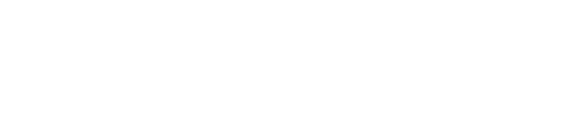

In [26]:
plot_settings6 = {
    'rankdir':'TB', 
    'filename': 'txtldivide',
    'port_labels': False,
    'node_border_colors': {
        ('agents', '1', 'DNA<br/>(counts)',): colors['DNA'],
        ('agents', '1', 'mRNA<br/>(counts)',): colors['RNA'],
        ('agents', '1', 'mRNA<br/>(concentrations)',): colors['RNA'],
        ('agents', '1', 'protein<br/>(concentrations)',): colors['protein'],
        ('agents', '2', 'DNA<br/>(counts)',): colors['DNA'],
        ('agents', '2', 'mRNA<br/>(counts)',): colors['RNA'],
        ('agents', '2', 'mRNA<br/>(concentrations)',): colors['RNA'],
        ('agents', '2', 'protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}
plot_bigraph(txtldivide, **plot_settings6, node_label_size='20')